In [1]:
# Load all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston

In [2]:
# Load the dataset
boston = load_boston()

In [3]:
bos = pd.DataFrame(boston.data)

In [4]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Assign column names to the dataset
bos.columns = boston.feature_names

In [6]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Attach the Target to the data set as well
bos['Price'] = pd.DataFrame(boston.target)

### DATASET INFO

In [8]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [9]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### DATA VALIDATION

#### Check for Nulls

In [10]:
bos.isnull().sum().sum()

0

In [11]:
# Min and the Max prices are:
print ("Minimum Price : ", bos.Price.min())
print ("Maximum Price : ", bos.Price.max())

Minimum Price :  5.0
Maximum Price :  50.0


### FEATURE ENGINEERING

If you see closely there are various features in the dataset that does not effect the Price.

The columns that actually carry any inference to the price will be The features, 'RM', 'LSTAT', and 'PTRATIO'.

<b><u>RM: This is the average number of rooms per dwelling</u></b>
As the number of rooms increases the price will increase

<b><u>LSTAT: This is the percentage lower status of the population</u></b>
Lower status means lower income as a result the Prices would be less. Lower income means more crime rate as well.

<b><u>PTRATIO: This is the pupil-teacher ratio by town</u></b>
If the value is more than, number of pupils will over shoot the number of teachers. This means it would effect education. As a result the Prices should reduce with increase in the number.

In [12]:
# Create the necessary dataset with the above details
boston_df = bos[["RM", "LSTAT", "PTRATIO", "Price"]]
boston_df.head()

,RM,LSTAT,PTRATIO,Price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


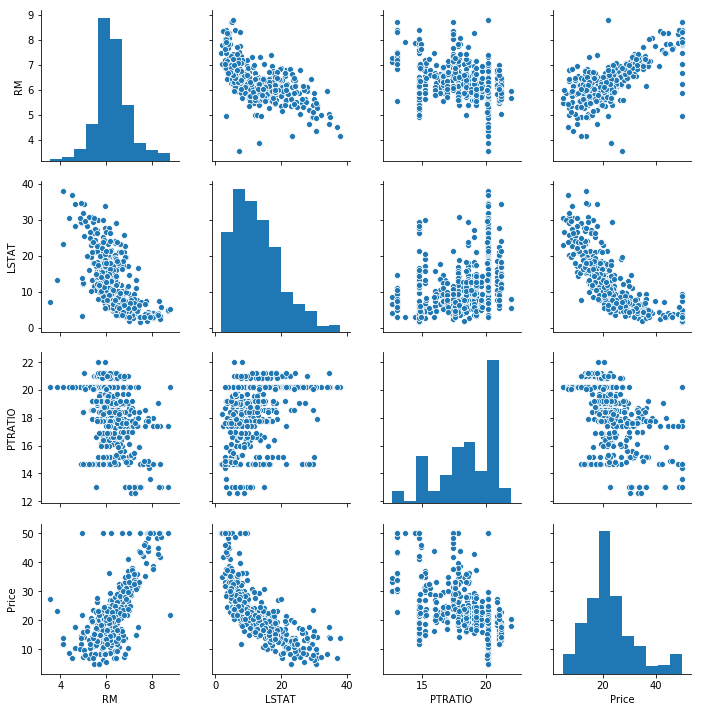

In [13]:
# Plot the pairplot
sns.pairplot(boston_df)

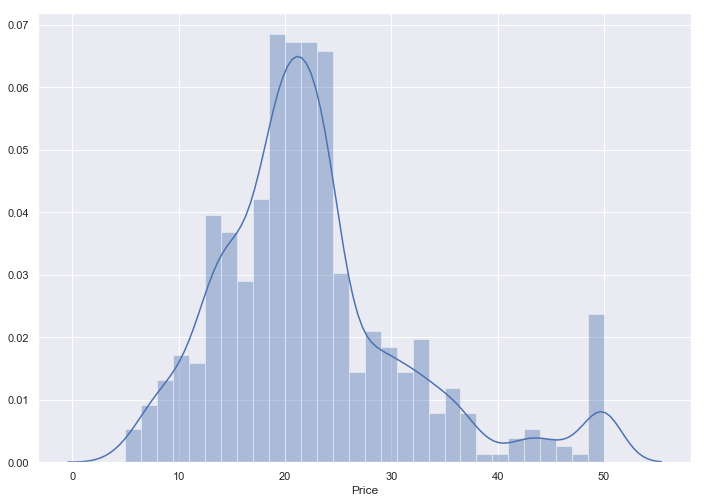

In [14]:
#KDE plot for the Price

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_df['Price'], bins=30)
plt.show()

#### We can see that the data is normally distributed and there are some outliers. 

In [28]:
# Remove the outliers
boston_df_clean = boston_df.drop(boston_df[boston_df.Price == 50].index, axis=0)

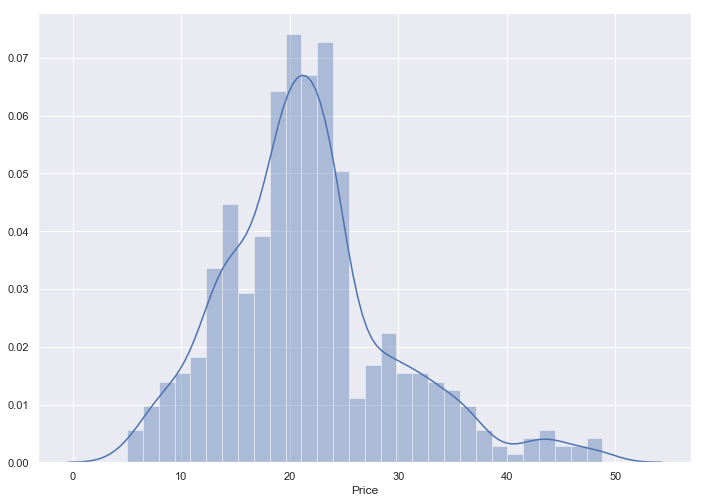

In [29]:
sns.distplot(boston_df_clean['Price'], bins=30)

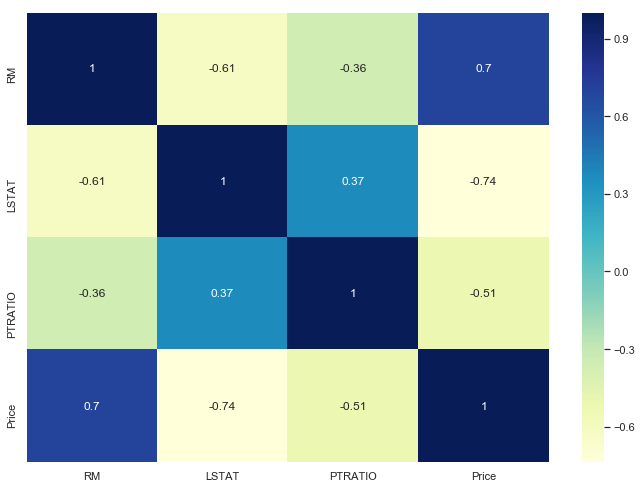

In [30]:
# PLot the correlation
sns.heatmap(boston_df.corr(),annot=True, cmap='YlGnBu')

### RANDON FOREST

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [32]:
rfc = RandomForestRegressor(n_estimators=100,n_jobs=-1, criterion='mse')

In [34]:
# Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(boston_df.drop("Price", axis=1), boston_df["Price"], test_size=0.3)

In [35]:
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
predict = rfc.predict(X_test)

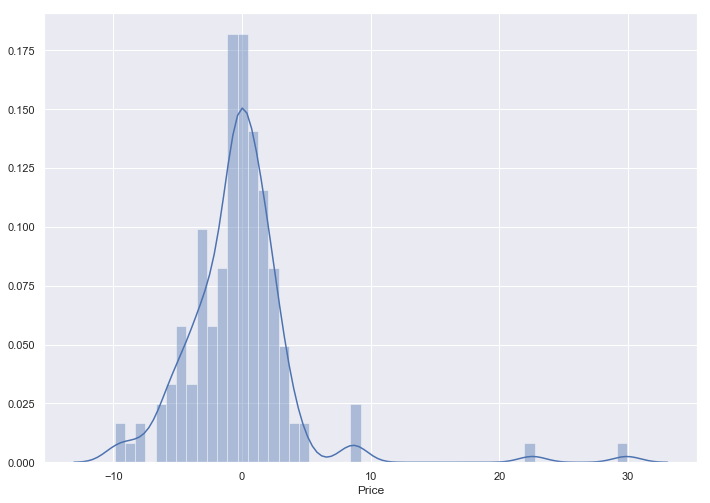

In [38]:
sns.distplot((y_test-predict),bins=50);

In [43]:
model_score = rfc.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.: ",model_score)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, predict))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, predict))

coefficient of determination R^2 of the prediction.:  0.9703956592558565
Mean squared error: 19.20
Test Variance score: 0.77


### CONSIDERING THE DATASET REMOVING OUTLIERS

In [44]:
X_train, X_test, y_train, y_test = train_test_split(boston_df_clean.drop("Price", axis=1), boston_df_clean["Price"], test_size=0.3)

In [45]:
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
predict = rfc.predict(X_test)
model_score = rfc.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.: ",model_score)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, predict))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, predict))

coefficient of determination R^2 of the prediction.:  0.9764489718939766
Mean squared error: 12.18
Test Variance score: 0.75
